In [2]:
import pandas as pd
import glob

file_pattern = 'devs/*.csv'
csv_files = glob.glob(file_pattern)

dfs = []
for file in csv_files:
    print(file)
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=False)
combined_df.to_csv('devs/combined_developer_activity.csv', index=False)


devs/kunal__botdeveloper_activity_0.csv
devs/amy_developer_activity_0.csv
devs/dieuanh_developer_activity_0 (1).csv
devs/andrew_developer_activity_0.csv
devs/andrew_developer_activity_1.csv
devs/dieuanh_developer_activity_2.csv
devs/donghee_developer_activity_0.csv
devs/donghee_developer_activity_1.csv
devs/dieuanh_developer_activity_0 (2).csv
devs/dieuanh_developer_activity_1.csv
devs/dieuanh_developer_activity_0.csv
devs/dieuanh_developer_activity_0 (3).csv
devs/dieuanh_developer_activity_0 (4).csv
devs/amy_developer_activity_0 copy.csv
devs/dieuanh_developer_activity_0 copy.csv
devs/dieuanh_developer_activity_0 (5).csv
devs/kunal_developer_activity_0.csv


In [23]:
df = pd.read_csv('devs/combined_developer_activity.csv')
deduplicated_df = df.drop_duplicates()
deduplicated_df.to_csv('devs/combined_developer_nodup_activity.csv', index=False)

In [31]:
import os
from tqdm import tqdm
import pandas as pd

orgs = os.listdir('orgs')
for org in tqdm(orgs):
    tqdm.write(f'orgs/{org}')
    df_commits = pd.read_csv(f'orgs/{org}/{org}_commits_0_bots_removed.csv')
    deduplicated_df_commits = df_commits.drop_duplicates()
    deduplicated_df_commits.to_csv(f'orgs/{org}/{org}_commits_0_bots_removed_nodup.csv', index=False)

    df_releases = pd.read_csv(f'orgs/{org}/releases.csv')
    deduplicated_df_releases = df_releases.drop_duplicates()
    deduplicated_df_releases.to_csv(f'orgs/{org}/releases_nodup.csv', index=False)

    df_weekly = pd.read_csv(f'orgs/{org}/{org}_weekly.csv')
    deduplicated_df_weekly = df_weekly.drop_duplicates()
    deduplicated_df_weekly.to_csv(f'orgs/{org}/{org}_weekly_nodup.csv', index=False)

    df_weekly_dev = pd.read_csv(f'orgs/{org}/weekly_dev_activity_bots_removed.csv')
    deduplicated_df_weekly_dev = df_weekly_dev.drop_duplicates()
    deduplicated_df_weekly_dev.to_csv(f'orgs/{org}/weekly_dev_activity_bots_removed_nodup.csv', index=False)
    

 16%|█▌        | 4/25 [00:00<00:00, 35.54it/s]

orgs/proyecto26
orgs/nodejs
orgs/mozilla
orgs/docker
orgs/Esri
orgs/cloudfoundry
orgs/vuejs


 16%|█▌        | 4/25 [00:00<00:00, 35.54it/s]

orgs/google


 48%|████▊     | 12/25 [00:00<00:00, 16.59it/s]

orgs/square
orgs/Yelp
orgs/Shopify
orgs/godaddy
orgs/IBM
orgs/cfpb
orgs/Netflix


 76%|███████▌  | 19/25 [00:01<00:00, 23.16it/s]

orgs/adobe
orgs/artsy
orgs/RedHatOfficial
orgs/newrelic
orgs/zalando
orgs/devtron-labs
orgs/guardian
orgs/kubernetes


100%|██████████| 25/25 [00:01<00:00, 20.75it/s]

orgs/stripe
orgs/ExpediaGroup


In [3]:
import pandas as pd

df = pd.read_csv('output/release_minor_rq1_data.csv')

reduced_df =  df[(df['total_devs'] != 0)]
reduced_df
reduced_df.to_csv('output/release_minor_rq1_data_reduced.csv', index=False)



In [130]:
import pandas as pd

df = pd.read_csv('output/release_minor_rq2_data.csv')

reduced_df =  df[(df['multitask_commits'] != 0)]
reduced_df
reduced_df.to_csv('output/release_minor_rq2_data_reduced.csv', index=False)

In [4]:
import pandas as pd

df = pd.read_csv('all_orgs_rq2_final_release_reduced.csv')
print(len(df))
major = df['release_major'].sum()
minor = df['release_minor'].sum()
patch = df['release_patch'].sum()

print(f'major: {major}\nminor: {minor}\npatch:{patch}')


5566
major: 84
minor: 607
patch:950


In [22]:
import pandas as pd

df = pd.read_csv('all_orgs_rq2_final_release_reduced.csv')

cnt = 0


if df['multitask_devs'] != df['multitask_commits']:
    cnt += 1
print(cnt)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
import os
', '.join(os.listdir('orgs'))
len(os.listdir('orgs'))

24

In [9]:
import pandas as pd

df_devs = pd.read_csv('devs/combined_developer_activity.csv')
df_devs_nodup = pd.read_csv('devs/combined_developer_nodup_activity.csv')

org = 'Esri'

df_commits = pd.read_csv(f'orgs/{org}/{org}_commits_0_bots_removed.csv')
df_weekly = pd.read_csv(f'orgs/{org}/{org}_weekly.csv')
df_weekly_devs = pd.read_csv(f'orgs/{org}/weekly_dev_activity_bots_removed.csv')
df_releases = pd.read_csv(f'orgs/{org}/releases.csv')

In [68]:
df_devs_nodup['date'] = pd.to_datetime(df_devs_nodup['date'], utc=True)

df_devs_nodup['new_week'] = df_devs_nodup.apply(lambda row: (row['date'].year, row['week']), axis=1)
df_devs_nodup['new_week'] = df_devs_nodup['new_week'].apply(str)

type(df_devs_nodup['new_week'][0])

str

In [60]:
from datetime import datetime

def convert_to_week(date_str):
    date_obj = datetime.strptime(date_str, "%d/%m/%Y")
    year_week = date_obj.isocalendar()[:2]

    return str(year_week)


In [61]:
import re

def extract_version_parts(version):
    cleaned_version = re.sub(r'[^0-9.]', '', version)
    parts = cleaned_version.split('.')
    
    major = parts[0] if len(parts) > 0 else 0
    minor = parts[1] if len(parts) > 1 else 0
    bug = parts[2:] if len(parts) > 2 else 0
    new_bug = []
    if type(bug) != type([]):
        bug = [bug]
    for b in bug:
        if b == '':
            pass
        else:
            new_bug.append(b)
    new_bug = [int(s) for s in new_bug]
    major = sum([int(s) for s in major])
    minor = sum([int(s) for s in minor])
    sum_bug = sum(new_bug)

    major_count = 0
    minor_count = 0
    bug_count = 0

    if sum_bug == 0:
        if minor == 0:
            major_count = 1
        else:
            minor_count = 1
    else:
        bug_count = 1
    
    return major, minor, sum_bug, major_count, minor_count, bug_count

In [62]:
import numpy as np

df_releases_sorted = df_releases.sort_values(by=['repo_name', 'version'], ascending=[True, True])


df_releases_sorted['date'] = df_releases_sorted['date'].apply(convert_to_week)
df_releases_sorted['week'] = df_releases_sorted['date']


df_releases_filtered = df_releases_sorted[['repo_name', 'week', 'version']]
df_releases_filtered['repo'] = df_releases_filtered['repo_name']

df_releases_filtered['major_v'], df_releases_filtered['minor_v'], df_releases_filtered['bug_v'], df_releases_filtered['major_c'], df_releases_filtered['minor_c'], df_releases_filtered['bug_c'] = zip(*df_releases_filtered['version'].apply(extract_version_parts))
df_release = df_releases_filtered[['repo', 'week', 'version', 'major_c', 'minor_c', 'bug_c']]

/var/folders/hx/3bvzkbh96331ghhrc13m9_0c0000gn/T/ipykernel_80770/638748247.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_releases_filtered['repo'] = df_releases_filtered['repo_name']


In [63]:
unique_repos = df_weekly['repo'].unique()
print(len(unique_repos))
unique_repos

25


array(['arcgis-webpack-plugin', 'spatial-framework-for-hadoop',
       'i3s-spec', 'arcgis-pro-sdk', 'arcgis-cookbook', 'OptimizeRasters',
       'geometry-api-java', 'arcgis-js-api', 'arcgis-js-cli',
       'arcgis-pro-sdk-community-samples', 'geoportal-server',
       'arcgis-powershell-dsc', 'arcgis-maps-sdk-samples-qt',
       'deep-learning-frameworks', 'esri-loader',
       'arcgis-maps-sdk-java-samples', 'esri-leaflet', 'lerc',
       'cityengine-sdk', 'arcgis-maps-sdk-dotnet-toolkit',
       'arcgis-maps-sdk-toolkit-qt', 'arcgis-rest-js',
       'arcgis-maps-sdk-dotnet-samples', 'arcgis-python-api',
       'calcite-design-system'], dtype=object)

In [64]:
from datetime import datetime

def convert_to_week(date_str):
    date_obj = datetime.strptime(date_str, "%d/%m/%Y")
    print(date_obj)
    year_week = date_obj.isocalendar()[:2]

    return year_week



In [65]:
import ast
def convert_and_access_key(row, key):
    try:
        dict_val = row if isinstance(row, dict) else ast.literal_eval(row)
        return dict_val.get(key)  
    except (ValueError, SyntaxError, TypeError):
        return None

In [84]:
import csv

headers = ['org', 'repo', 'year', 'week', 'total_devs', 'shared_devs',
           'total_commits', 'shared_commits', 'avg_unit_complexity', 'avg_unit_size',
           'avg_s_focus', 'lines', 'modified_files', 'release_score',  'avg_multitasking_repos']


data = []

for unique_repo in unique_repos:
    for year in ['2022', '2023']:
        lines = 0
        modified_files = 0
        for week in range(1, 53):
            filtered_df_weekly_devs = df_weekly_devs[(df_weekly_devs['repo'] == unique_repo) & (df_weekly_devs['week'] ==  f"({year}, {week})")]
            filtered_df_weekly = df_weekly[(df_weekly['repo'] == unique_repo) & (df_weekly['week'] ==  f"({year}, {week})")]
            filtered_df_commits = df_commits[(df_commits['repo'] == unique_repo) & (df_commits['week'] ==  f"({year}, {week})")]
            filtered_df_release = df_release[(df_release['repo'] == unique_repo) & (df_release['week'] ==  f"({year}, {week})")]
#             if len(filtered_df_weekly) > 0:
            unique_names = filtered_df_weekly_devs['name'].unique()
            total_devs = len(unique_names)
            total_commits = len(filtered_df_weekly_devs)
            shared_commits_df = filtered_df_weekly_devs[filtered_df_weekly_devs['shared']]
            shared_commits = len(shared_commits_df)
            unique_shared_emails = shared_commits_df['name'].unique()
            shared_devs = len(unique_shared_emails)

            # if len(filtered_df_weekly) > 0:
            #     avg_unit_complexity = ast.literal_eval(filtered_df_weekly['unit_complexity'].iloc[0])['avg']
            #     avg_unit_size =  ast.literal_eval(filtered_df_weekly['unit_size'].iloc[0])['avg']
            # else:
            #     avg_unit_complexity = 'NA'
            #     avg_unit_size = 'NA'

            filtered_df_shared_commits = filtered_df_commits[filtered_df_commits['name'].isin(unique_shared_emails)]
            filtered_df_weekly_shared_devs = filtered_df_weekly_devs[filtered_df_weekly_devs['name'].isin(unique_shared_emails)]
            


            if len(filtered_df_release) > 0:
                release_major = filtered_df_release['major_c'].values[0]
                release_minor = filtered_df_release['minor_c'].values[0]
                release_bug = filtered_df_release['bug_c'].values[0]
                # release = {
                #     'major' : release_major,
                #     'minor' : release_minor,
                #     'bug' : release_bug,
                    
                # }
                release_score = release_major * 10 + release_minor * 5 + release_bug * 2
                # release_score = 'NA'
            else:
                # release = {
                #     'major' : 0,
                #     'minor' : 0,
                #     'bug' : 0,
                    
                # }
                release_score = 'NA'


            modified_files = filtered_df_commits['n_modified_files'].sum()

            if len(filtered_df_shared_commits) > 0:
                avg_unit_complexity = filtered_df_shared_commits['unit_complexity'].sum() / shared_devs
                avg_unit_size = filtered_df_shared_commits['unit_complexity'].sum() / shared_devs
                lines = filtered_df_shared_commits['lines'].sum()
            else:
                avg_unit_complexity = 'NA'
                avg_unit_size = 'NA'
                lines = 'NA'


            if len(filtered_df_weekly_shared_devs) > 0:
                avg_s_focus = filtered_df_weekly_shared_devs['s_focus'].sum() / shared_devs
            else:
                avg_s_focus = 'NA'

            multitasking_repos = {}

            for unique_name in unique_shared_emails:
                filtered_df_devs_nodup = df_devs_nodup[(df_devs_nodup['name'] == unique_name) & (df_devs_nodup['new_week'] == f"({year}, {week})")]
                multitasking_repos[unique_name] = len(filtered_df_devs_nodup['repo'].unique())

            for k in multitasking_repos.keys():
                if multitasking_repos[k] == 0:
                    multitasking_repos[k] = 1
            
            if shared_devs > 0:
                avg_multitasking_repos = sum([v for v in multitasking_repos.values()]) / shared_devs
            else:
                avg_multitasking_repos = 'NA'


            data.append([org, unique_repo, year, week, total_devs, shared_devs, total_commits, shared_commits, avg_unit_complexity, avg_unit_size, avg_s_focus, lines, modified_files, release_score, avg_multitasking_repos])

            # line = [unique_repo, org, f"({year}, {week})", ]

with open(f'otest.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    writer.writerow(headers)
    
    for row in data:
        writer.writerow(row)

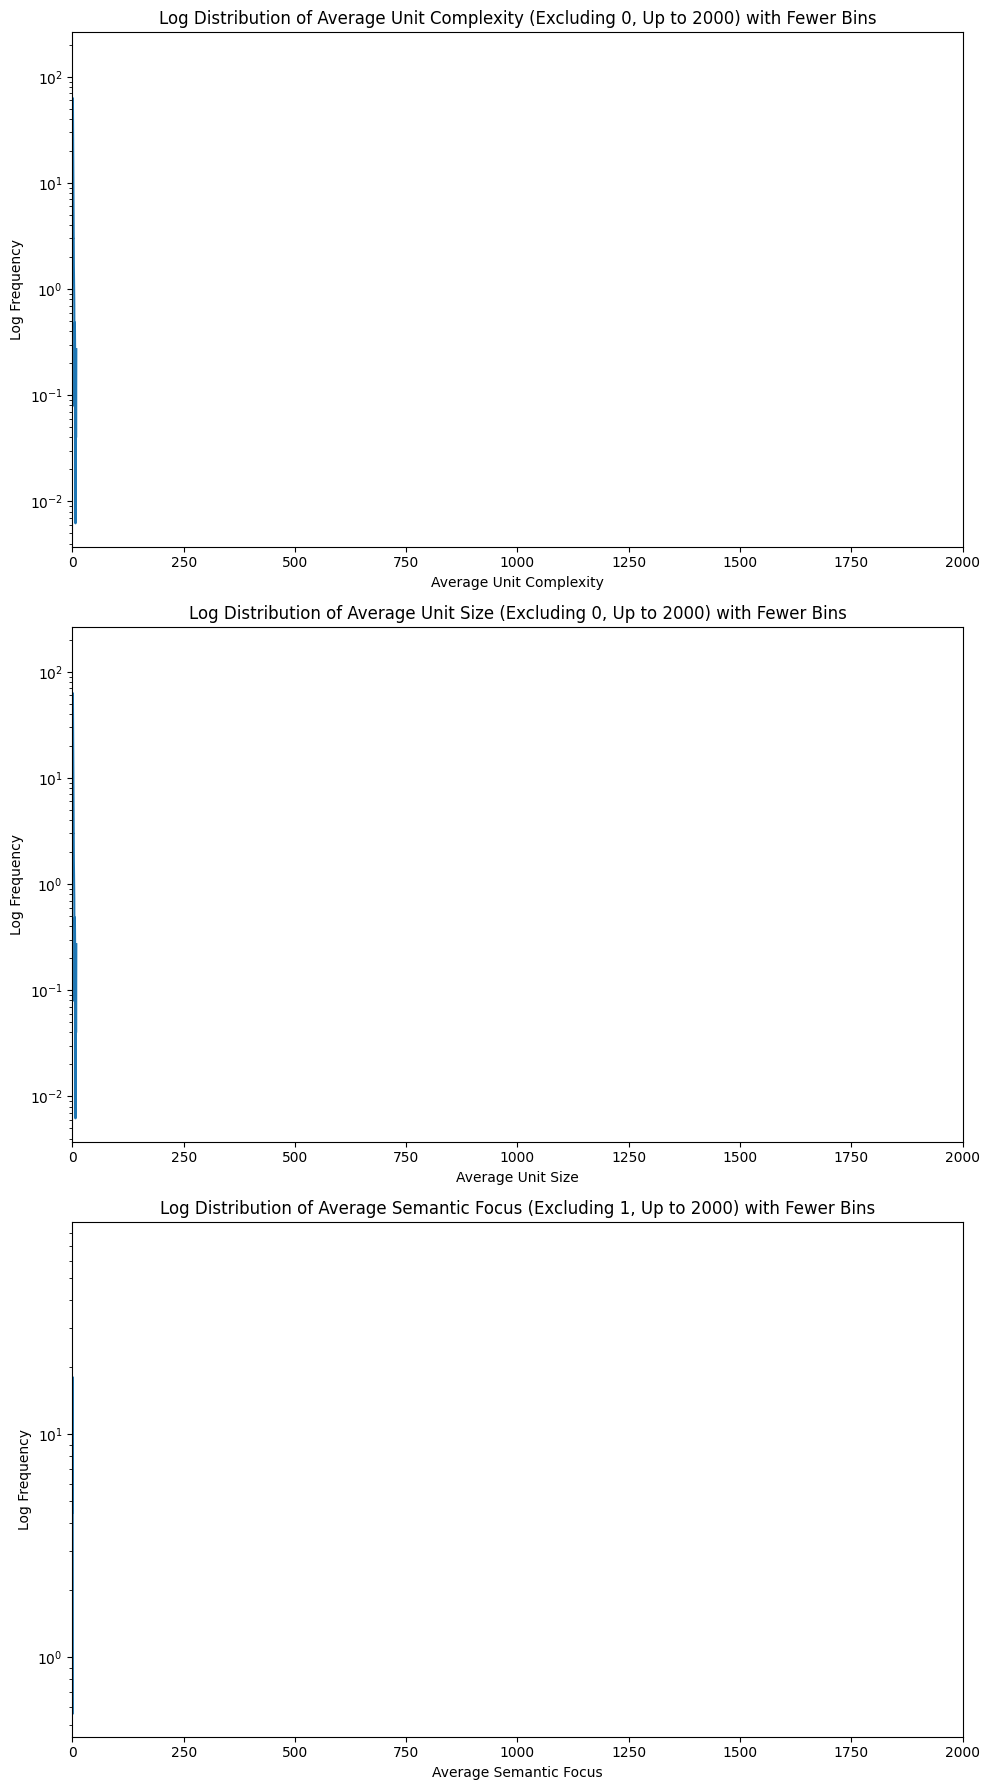

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the data from the specified file
df_reloaded = pd.read_csv('processed_new/combined_processed.csv')

# First, let's filter the dataframe based on the previously specified conditions before plotting
df_reloaded_filtered = df_reloaded.dropna(subset=['avg_unit_complexity', 'avg_unit_size', 'avg_s_focus'])
df_reloaded_excluded = df_reloaded_filtered[
    (df_reloaded_filtered['avg_unit_complexity'] != 0) & 
    (df_reloaded_filtered['avg_unit_size'] != 0) & 
    (df_reloaded_filtered['avg_s_focus'] != 1) & 
    (df_reloaded_filtered['lines'] != 0)
]

# Now, let's plot the three specified metrics with modifications applied: avg_unit_complexity, avg_unit_size, and avg_s_focus
# with log scale on y-axis and fewer bins for clarity

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plotting Average Unit Complexity with modifications
sns.histplot(df_reloaded_excluded[df_reloaded_excluded['avg_unit_complexity'] <= 2000]['avg_unit_complexity'], bins=50, kde=True, ax=axes[0], log_scale=(False, True))
axes[0].set_title('Log Distribution of Average Unit Complexity (Excluding 0, Up to 2000) with Fewer Bins')
axes[0].set_xlabel('Average Unit Complexity')
axes[0].set_xlim(0, 2000)
axes[0].set_ylabel('Log Frequency')

# Plotting Average Unit Size with modifications
sns.histplot(df_reloaded_excluded[df_reloaded_excluded['avg_unit_size'] <= 2000]['avg_unit_size'], bins=50, kde=True, ax=axes[1], log_scale=(False, True))
axes[1].set_title('Log Distribution of Average Unit Size (Excluding 0, Up to 2000) with Fewer Bins')
axes[1].set_xlabel('Average Unit Size')
axes[1].set_xlim(0, 2000)
axes[1].set_ylabel('Log Frequency')

# Plotting Average Semantic Focus with modifications
sns.histplot(df_reloaded_excluded[df_reloaded_excluded['avg_s_focus'] <= 2000]['avg_s_focus'], bins=50, kde=True, ax=axes[2], log_scale=(False, True))
axes[2].set_title('Log Distribution of Average Semantic Focus (Excluding 1, Up to 2000) with Fewer Bins')
axes[2].set_xlabel('Average Semantic Focus')
axes[2].set_xlim(0, 2000)
axes[2].set_ylabel('Log Frequency')

plt.tight_layout()
plt.show()

In [98]:
import csv

headers = ['org', 'repo', 'year', 'week', 'total_devs', 'multitask_devs',
           'total_commits', 'multitask_commits', 'avg_unit_complexity', 'avg_unit_size',
           'avg_commit_proportion', 'lines_added', 'modified_files', 'release_major', 'release_minor', 'release_patch',  'avg_multitasking_repos', 'multitasking_repos']


data = []

for unique_repo in unique_repos:
    for year in ['2022', '2023']:
        lines = 0
        modified_files = 0
        for week in range(1, 53):
            filtered_df_weekly_devs = df_weekly_devs[(df_weekly_devs['repo'] == unique_repo) & (df_weekly_devs['week'] ==  f"({year}, {week})")]
            filtered_df_weekly = df_weekly[(df_weekly['repo'] == unique_repo) & (df_weekly['week'] ==  f"({year}, {week})")]
            filtered_df_commits = df_commits[(df_commits['repo'] == unique_repo) & (df_commits['week'] ==  f"({year}, {week})")]
            filtered_df_release = df_release[(df_release['repo'] == unique_repo) & (df_release['week'] ==  f"({year}, {week})")]
#             if len(filtered_df_weekly) > 0:
            unique_names = filtered_df_weekly_devs['name'].unique()
            total_devs = len(unique_names)
            total_commits = len(filtered_df_weekly_devs)
            shared_commits_df = filtered_df_weekly_devs[filtered_df_weekly_devs['shared']]
            shared_commits = len(shared_commits_df)
            unique_shared_emails = shared_commits_df['name'].unique()
            shared_devs = len(unique_shared_emails)

            # if len(filtered_df_weekly) > 0:
            #     avg_unit_complexity = ast.literal_eval(filtered_df_weekly['unit_complexity'].iloc[0])['avg']
            #     avg_unit_size =  ast.literal_eval(filtered_df_weekly['unit_size'].iloc[0])['avg']
            # else:
            #     avg_unit_complexity = 'NA'
            #     avg_unit_size = 'NA'

            filtered_df_shared_commits = filtered_df_commits[filtered_df_commits['name'].isin(unique_shared_emails)]
            filtered_df_weekly_shared_devs = filtered_df_weekly_devs[filtered_df_weekly_devs['name'].isin(unique_shared_emails)]
            


            if len(filtered_df_release) > 0:
                release_major = filtered_df_release['major_c'].values[0]
                release_minor = filtered_df_release['minor_c'].values[0]
                release_patch = filtered_df_release['bug_c'].values[0]
                # release = {
                #     'major' : release_major,
                #     'minor' : release_minor,
                #     'bug' : release_bug,
                    
                # }
                release_score = release_major * 10 + release_minor * 5 + release_patch * 2
                # release_score = 'NA'
            else:
                release_major = 'NA'
                release_minor = 'NA'
                release_patch = 'NA'
                # release = {
                #     'major' : 0,
                #     'minor' : 0,
                #     'bug' : 0,
                    
                # }
                release_score = 'NA'


            # lines = filtered_df_commits['lines'].sum()
            modified_files = filtered_df_commits['n_modified_files'].sum()

            if len(filtered_df_shared_commits) > 0:
                avg_unit_complexity = filtered_df_shared_commits['unit_complexity'].sum() / shared_devs
                avg_unit_size = filtered_df_shared_commits['unit_complexity'].sum() / shared_devs
                lines = filtered_df_shared_commits['lines'].sum()
            else:
                avg_unit_complexity = 'NA'
                avg_unit_size = 'NA'
                lines = 'NA'


            if len(filtered_df_weekly_shared_devs) > 0:
                avg_s_focus = filtered_df_weekly_shared_devs['s_focus'].sum() / shared_devs
            else:
                avg_s_focus = 'NA'

            multitasking_repos = {}
            multitasking_repos_2 = {}

            for unique_name in unique_shared_emails:
                filtered_df_devs_nodup = df_devs_nodup[(df_devs_nodup['name'] == unique_name) & (df_devs_nodup['new_week'] == f"({year}, {week})")]
                multitasking_repos[unique_name] = len(filtered_df_devs_nodup['repo'].unique())
                multitasking_repos_2[unique_name] = {'repos': list(filtered_df_devs_nodup['repo'].unique()), 'count' : len(filtered_df_devs_nodup['repo'].unique())}

            for k in multitasking_repos.keys():
                if multitasking_repos[k] == 0:
                    multitasking_repos[k] = 1
            
            if shared_devs > 0:
                avg_multitasking_repos = sum([v for v in multitasking_repos.values()]) / shared_devs
            else:
                avg_multitasking_repos = 'NA'


            data.append([org, unique_repo, year, week, total_devs, shared_devs, total_commits, shared_commits, avg_unit_complexity, avg_unit_size, avg_s_focus, lines, modified_files, release_major, release_minor, release_patch avg_multitasking_repos, multitasking_repos_2])

            # line = [unique_repo, org, f"({year}, {week})", ]

with open(f'otest.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    
    writer.writerow(headers)
    
    for row in data:
        writer.writerow(row)

In [29]:
import pandas as pd

df = pd.read_csv('output/test2_rq1_data.csv')

df_2 = df[(df['total_commit_per_total_dev'] != 1.0) & (~df['total_commit_per_total_dev'].isna())]

df_2


55

In [2]:
def get_org(url):
    return url.split('/')[-2]

In [22]:
from datetime import datetime

def convert_to_week_year(date_str):
    date_obj = datetime.strptime(date_str, "%d/%m/%Y")
    year_week = date_obj.isocalendar()[:2]

    return int(''.join(str(year_week).split(',')[0][1:]))

def convert_to_week_week(date_str):
    date_obj = datetime.strptime(date_str, "%d/%m/%Y")
    year_week = date_obj.isocalendar()[:2]

    return int(''.join(str(year_week).split(',')[1][:-1]))

In [10]:
import pandas as pd

df = pd.read_csv('repos/selected_repos.csv')


df['org'] = df['url'].apply(get_org)
df['created_week'] = df['created_at'].apply(convert_to_week)

df_filtered = df[['org', 'repo', 'created_week']]

df_filtered.to_csv('repos/selected_repos_created_week.csv', index=False)

In [28]:
import re

def find_first_pattern(text):
    pattern = re.compile(r'\d+\.\d+\.\d+')
    match = pattern.search(text)
    
    if match:
        return match.group()
    return 'NA'

In [37]:
import pandas as pd
import glob

file_pattern = 'orgs/*/releases.csv'
csv_files = glob.glob(file_pattern)

dfs = []
for file in csv_files:
    print(file)
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=False)
combined_df.rename(columns={'repo_name': 'repo'}, inplace=True)
combined_df['week'] = combined_df['date'].apply(convert_to_week)
combined_df['year'] = combined_df['date'].apply(convert_to_week_year)
combined_df['week'] = combined_df['date'].apply(convert_to_week_week)
combined_df['simple_version'] = combined_df['version'].apply(find_first_pattern)
combined_df_filtered = combined_df[['repo', 'year', 'week', 'simple_version']]
combined_df_filtered_sorted = combined_df_filtered.sort_values(by=['repo', 'year', 'week', 'simple_version'], ascending=[True, True, True, True])
combined_df_filtered_sorted.to_csv('release/all_release.csv', index=False)

orgs/proyecto26/releases.csv
orgs/nodejs/releases.csv
orgs/mozilla/releases.csv
orgs/docker/releases.csv
orgs/Esri/releases.csv
orgs/cloudfoundry/releases.csv
orgs/vuejs/releases.csv
orgs/google/releases.csv
orgs/square/releases.csv
orgs/Yelp/releases.csv
orgs/Shopify/releases.csv
orgs/godaddy/releases.csv
orgs/IBM/releases.csv
orgs/cfpb/releases.csv
orgs/Netflix/releases.csv
orgs/adobe/releases.csv
orgs/artsy/releases.csv
orgs/RedHatOfficial/releases.csv
orgs/newrelic/releases.csv
orgs/zalando/releases.csv
orgs/devtron-labs/releases.csv
orgs/guardian/releases.csv
orgs/kubernetes/releases.csv
orgs/stripe/releases.csv
orgs/ExpediaGroup/releases.csv


In [49]:
df = pd.read_csv('release/all_release.csv')

df['release'] = 'NA'

def compare_versions(v1, v2):
    try:
        v1_nums = list(map(int, str(v1).split('.')))
        v2_nums = list(map(int, str(v2).split('.')))
    except ValueError:
       
        return 'NA'
    
    for i in range(len(v1_nums)):
        if v1_nums[i] < v2_nums[i]:
            if i == 0:
                return 'major'
            elif i == 1:
                return 'minor'
            else:
                return 'patch'
    return 'NA'

for i in range(1, len(df)):
    if df.loc[i, 'repo'] == df.loc[i-1, 'repo']:
        df.loc[i, 'release'] = compare_versions(df.loc[i-1, 'simple_version'], df.loc[i, 'simple_version'])


df = df[(df['release'] == 'major') | (df['release'] == 'minor')]
df.to_csv('release/all_release_mm.csv', index=False)

In [68]:
import pandas as pd

release_counts = df.groupby('repo')['release'].value_counts().unstack(fill_value=0)


repos_with_2_major = release_counts[release_counts['major'] >= 2].index.tolist()

repos_with_2_minor = release_counts[(release_counts['minor'] >= 2)].index.tolist()

df_major = df[df['repo'].isin(repos_with_2_major)]
df_minor = df[df['repo'].isin(repos_with_2_minor)]
# df_minor = df[df['repo'].isin(repos_with_2_minor) & ~df['repo'].isin(repos_with_2_major)]


df_major.to_csv('release/repos_with_2_major_releases.csv', index=False)
print("Saved repos with at least 2 major releases.")

df_minor.to_csv('release/repos_with_2_minor_releases.csv', index=False)
print("Saved repos with at least 2 minor releases and less than 2 major releases.")


Saved repos with at least 2 major releases.
Saved repos with at least 2 minor releases and less than 2 major releases.


In [69]:
major_df = pd.read_csv('release/repos_with_2_major_releases.csv')

# major_df[major_df['release'] == 'major']
print(len(major_df['repo'].unique()))

52


In [70]:
minor_df = pd.read_csv('release/repos_with_2_minor_releases.csv')

# minor_df[minor_df['release'] == 'minor']
print(len(minor_df['repo'].unique()))

182


In [57]:
release_counts = df.groupby('repo')['release'].value_counts().unstack(fill_value=0)

release_counts['major_minor_total'] = release_counts['major'] + release_counts['minor']

repos_with_2_major_or_minor = release_counts[release_counts['major_minor_total'] >= 2].index.tolist()


df_major_or_minor = df[df['repo'].isin(repos_with_2_major_or_minor)]

if not df_major_or_minor.empty:
    df_major_or_minor.to_csv('release/repos_with_at_least_2_major_or_minor_releases.csv', index=False)
    print("Saved repos with at least 2 major or minor releases.")

Saved repos with at least 2 major or minor releases.


In [61]:
major_minor_df = pd.read_csv('release/repos_with_at_least_2_major_or_minor_releases.csv')

print(len(major_minor_df['repo'].unique()))

199


In [75]:
import pandas as pd


df_major_releases = pd.read_csv('release/repos_with_2_major_releases.csv')
df_major_releases = df[df['release'] == 'major']


new_data = []
for repo, group in df_major_releases.groupby('repo'):
    group = group.sort_values(by=['year', 'week']) 
    for i in range(len(group) - 1):
        year1, week1 = group.iloc[i]['year'], group.iloc[i]['week']
        year2, week2 = group.iloc[i+1]['year'], group.iloc[i+1]['week']
    
        if year2 == year1: 
            weeks_diff = week2 - week1
        else:  
            weeks_diff = (year2 - year1 - 1) * 52 + (52 - week1 + week2)

        new_data.append({
            'repo': repo,
            'weeks_between_major_releases': weeks_diff,
            'first_release_year': year1,
            'first_release_week': week1,
            'second_release_year': year2,
            'second_release_week': week2
        })

# Step 3: Create a new DataFrame
new_df = pd.DataFrame(new_data)

new_df.to_csv('release/major-major.csv', index=False)


In [76]:
import pandas as pd


df_major_releases = pd.read_csv('release/repos_with_2_minor_releases.csv')
df_major_releases = df[df['release'] == 'minor']


new_data = []
for repo, group in df_major_releases.groupby('repo'):
    group = group.sort_values(by=['year', 'week']) 
    for i in range(len(group) - 1):
        year1, week1 = group.iloc[i]['year'], group.iloc[i]['week']
        year2, week2 = group.iloc[i+1]['year'], group.iloc[i+1]['week']
        
 
        if year2 == year1: 
            weeks_diff = week2 - week1
        else:  # Different years
            weeks_diff = (year2 - year1 - 1) * 52 + (52 - week1 + week2)
        
        new_data.append({
            'repo': repo,
            'weeks_between_minor_releases': weeks_diff,
            'first_release_year': year1,
            'first_release_week': week1,
            'second_release_year': year2,
            'second_release_week': week2
        })

# Step 3: Create a new DataFrame
new_df = pd.DataFrame(new_data)

new_df.to_csv('release/minor-minor.csv', index=False)

In [79]:
df_major_releases = pd.read_csv('release/major-major.csv')
df_major_releases['unique_idx'] = range(1, len(df_major_releases) + 1)
df_major_releases.to_csv('release/major-major-idx.csv', index=False)

df_minor_releases = pd.read_csv('release/minor-minor.csv')
df_minor_releases['unique_idx'] = range(1, len(df_minor_releases) + 1)
df_minor_releases.to_csv('release/minor-minor-idx.csv', index=False)

    df_devs_nodup = pd.read_csv('devs/combined_developer_nodup_activity.csv')

    df_created = pd.read_csv('repos/selected_repos_created_week.csv')

    # org = input("Org name: ")

    df_commits = pd.read_csv(f'orgs/{org}/{org}_commits_0_bots_removed_nodup.csv')
    df_weekly = pd.read_csv(f'orgs/{org}/{org}_weekly_nodup.csv')
    df_weekly_devs = pd.read_csv(f'orgs/{org}/weekly_dev_activity_bots_removed_nodup.csv')
    df_releases = pd.read_csv(f'orgs/{org}/releases_nodup.csv')


In [87]:
def selected_repo_convert(ss):
    year = ''.join(ss.split(',')[0][1:])
    week = ''.join(ss.split(',')[1][:-1])

    return f'{year}-{week}'

In [ ]:
# Load other CSV files
import os
from tqdm import tqdm

df_releases = df_major_releases
for org in tqdm(os.listdir('orgs')):
    # tqdm.write(org)
    df_a = pd.read_csv(f'orgs/{org}/weekly_dev_activity_bots_removed_nodup.csv')
    # df_a['week'] = df_a['week'].apply(selected_repo_convert)


    def assign_index(row, df_releases):
        for _, release_row in df_releases.iterrows():
            first_release_week = f"{release_row['first_release_year']}-{release_row['first_release_week']:02d}".strip()
            second_release_week = f"{release_row['second_release_year']}-{release_row['second_release_week']:02d}".strip()

            current_week = selected_repo_convert(row['week'])
            yw = current_week.split('-')
            year = ''.join(yw[0])
            week = ''.join(yw[1])
            current_week = f"{year}-{int(week):02d}".strip()
            # print(first_release_week, current_week, second_release_week)

            if release_row['repo'] == row['repo']:
                if first_release_week < current_week <= second_release_week:
                    return int(release_row['unique_idx'])
        return None


    df_a['assigned_idx'] = df_a.apply(assign_index, df_releases=df_releases, axis=1)

  
    df_a.to_csv(f'orgs/{org}/weekly_dev_activity_bots_removed_nodup_major_idx.csv', index=False)

In [ ]:
# Load other CSV files
import os
from tqdm import tqdm

df_major_releases = pd.read_csv('release/major-major-idx.csv')
df_releases = df_major_releases
for org in tqdm(os.listdir('orgs')):
    # tqdm.write(org)
    df_a = pd.read_csv(f'orgs/{org}/{org}_weekly_nodup.csv')
    # df_a['week'] = df_a['week'].apply(selected_repo_convert)

    def assign_index(row, df_releases):
        for _, release_row in df_releases.iterrows():
            first_release_week = f"{release_row['first_release_year']}-{release_row['first_release_week']:02d}".strip()
            second_release_week = f"{release_row['second_release_year']}-{release_row['second_release_week']:02d}".strip()

            current_week = selected_repo_convert(row['week'])
            yw = current_week.split('-')
            year = ''.join(yw[0])
            week = ''.join(yw[1])
            current_week = f"{year}-{int(week):02d}".strip()
            # print(first_release_week, current_week, second_release_week)
 
            if release_row['repo'] == row['repo']:
                if first_release_week < current_week <= second_release_week:
                    return int(release_row['unique_idx'])
        return None

  
    df_a['assigned_idx'] = df_a.apply(assign_index, df_releases=df_releases, axis=1)


    df_a.to_csv(f'orgs/{org}/{org}_weekly_nodup_major_idx.csv', index=False)

In [119]:
# Load other CSV files
import os
from tqdm import tqdm

df_releases = pd.read_csv('release/minor-minor-idx.csv')
for org in tqdm(os.listdir('orgs')):
    # tqdm.write(org)
    df_a = pd.read_csv(f'orgs/{org}/{org}_commits_0_bots_removed_nodup.csv')
    # df_a['week'] = df_a['week'].apply(selected_repo_convert)

    def assign_index(row, df_releases):
        for _, release_row in df_releases.iterrows():
            first_release_week = f"{release_row['first_release_year']}-{release_row['first_release_week']:02d}".strip()
            second_release_week = f"{release_row['second_release_year']}-{release_row['second_release_week']:02d}".strip()

            current_week = selected_repo_convert(row['week'])
            yw = current_week.split('-')
            year = ''.join(yw[0])
            week = ''.join(yw[1])
            current_week = f"{year}-{int(week):02d}".strip()
            # print(first_release_week, current_week, second_release_week)
            if release_row['repo'] == row['repo']:
                if first_release_week < current_week <= second_release_week:
                    return int(release_row['unique_idx'])
        return None

    df_a['assigned_idx'] = df_a.apply(assign_index, df_releases=df_releases, axis=1)

    df_a.to_csv(f'orgs/{org}/{org}_commits_0_bots_removed_nodup_minor_idx.csv', index=False)

 28%|██▊       | 7/25 [21:05<54:13, 180.73s/it]


KeyboardInterrupt: 

In [114]:
def convert_new(ss):
    ss2 = selected_repo_convert(str(ss))
    yw = ss2.split('-')
    year = ''.join(yw[0])
    week = ''.join(yw[1])
    current_week = f"{year}-{int(week):02d}".strip()
    return current_week

In [118]:
df_releases = df_major_releases
df_a = pd.read_csv('devs/combined_developer_nodup_activity.csv')
df_a['date'] = pd.to_datetime(df_a['date'], utc=True)

df_a['new_week'] = df_a.apply(lambda row: (row['date'].year, row['week']), axis=1)
df_a['new_week'] = df_a['new_week'].apply(str)


df_a['new_new_week'] = df_a['new_week'].apply(convert_new)

df_a.to_csv('devs/combined_developer_nodup_activity_minor_idx.csv', index=False)
# # Prepare a function to determine if a week is between the two releases
# def assign_index(row, df_releases):
#     for _, release_row in df_releases.iterrows():
#         first_release_week = f"{release_row['first_release_year']}-{release_row['first_release_week']}".strip()
#         second_release_week = f"{release_row['second_release_year']}-{release_row['second_release_week']}".strip()
#         current_week = selected_repo_convert(str(row['new_week']))
#         yw = current_week.split('-')
        
#         year = ''.join(yw[0])
#         week = ''.join(yw[1])
#         current_week = f"{year}-{int(week):02d}".strip()
#         print(first_release_week, current_week, second_release_week)
#         # Assuming the week column format is 'YYYY-WW' and comparable as strings
#         if release_row['repo'] == row['repo']:
#             if first_release_week < current_week <= second_release_week:
#                 return int(release_row['unique_idx'])
#         return None

# # Assign index based on the week being between the first and second releases
# df_a['assigned_idx'] = df_a.apply(assign_index, df_releases=df_releases, axis=1)

# # Save the modified DataFrames back to CSV
# df_a.to_csv('devs/combined_developer_nodup_activity_major_idx.csv', index=False)

In [120]:
os.listdir('orgs')

['proyecto26',
 'nodejs',
 'mozilla',
 'docker',
 'Esri',
 'cloudfoundry',
 'vuejs',
 'google',
 'square',
 'Yelp',
 'Shopify',
 'godaddy',
 'IBM',
 'cfpb',
 'Netflix',
 'adobe',
 'artsy',
 'RedHatOfficial',
 'newrelic',
 'zalando',
 'devtron-labs',
 'guardian',
 'kubernetes',
 'stripe',
 'ExpediaGroup']

In [129]:
df_created_since = pd.read_csv('output/f5_rq2_data_reduced.csv')
df_created_since.sort_values(by=['created_since'], ascending=[True])

,org,repo,year,week,total_devs,multitask_devs,total_commits,multitask_commits,frequency_multitask_commits,avg_unit_complexity,...,multitask_ratio,release_major,release_minor,release_major_minor,release_patch,avg_multitasking_repos_count,max_multitasking_repos_count,median_multitasking_repos_count,sum_s_focus,created_since
315,Netflix,metaflow-ui,2022,1,2,2,2,2,1.0,0.991228,...,1.000000,0,0,0,0,2.000000,3.0,2.0,0.889975,10
316,Netflix,metaflow-ui,2022,2,2,2,2,2,1.0,0.000000,...,1.000000,0,0,0,0,1.000000,1.0,1.0,1.000000,11
317,Netflix,metaflow-ui,2022,3,1,1,1,1,1.0,1.273585,...,1.000000,0,0,0,0,1.000000,1.0,1.0,0.500000,12
318,Netflix,metaflow-ui,2022,4,3,3,3,3,1.0,0.000000,...,1.000000,0,1,1,0,2.333333,3.0,3.0,1.457692,13
319,Netflix,metaflow-ui,2022,6,2,2,2,2,1.0,0.000000,...,1.000000,0,0,0,0,2.000000,2.0,2.0,1.000000,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,newrelic,newrelic-ruby-agent,2023,43,6,1,6,1,1.0,0.000000,...,0.166667,0,1,1,0,1.000000,1.0,1.0,0.528321,779
3494,newrelic,newrelic-ruby-agent,2023,44,7,3,7,3,1.0,0.000000,...,0.428571,0,1,1,0,1.000000,1.0,1.0,0.788016,780
3495,newrelic,newrelic-ruby-agent,2023,47,4,1,4,1,1.0,1.000000,...,0.250000,0,0,0,0,1.000000,1.0,1.0,0.389975,783
3496,newrelic,newrelic-ruby-agent,2023,48,5,1,5,1,1.0,0.000000,...,0.200000,0,0,0,0,1.000000,1.0,1.0,0.389975,784
